# tor-gob
## Resumen de pruebas con Tor usando federal.csv

### Última actualización: 

In [1]:
from datetime import datetime
print(datetime.now().strftime("%d-%m-%Y"))

09-10-2023


### Carga los datasets

In [2]:
import os
import pandas
import tldextract

# tor-gob.csv

csv_file = '../datos/tor-gob.csv'

#  date~time~request_type~csv_name~http_code~url~html_title~agent_ip~agent_country~asn~command_result
csv_types = {'date': 'string',
             'time': 'string',
             'request_type': 'string',
             'csv_name': 'string',
             'http_code': 'Int16',
             'url': 'string',
             'html_title': 'string', 
             'agent_ip': 'string',
             'agent_country': 'string',
             'asn': 'string',
             'command_result': 'Int16'}

df = pandas.read_csv(
        csv_file,
        sep=r"~",
        lineterminator='\n',
        encoding="latin-1",
        dtype=csv_types)

rows, cols = df.shape
print(csv_file, ":", cols, "columnas,", rows, "filas")

../datos/tor-gob.csv : 11 columnas, 201106 filas


### Interpretación de los códigos de respuesta HTTP

- Anomalías (0, -1).
- Respuestas satisfactorias (200).
- Redirecciones (300, 301, 302).
- Peticiones malformadas o mal estructuradas (400).
- Respuestas no autorizadas (401).
- Peticiones denegadas, prohibidas o rechazadas (403).
- Recurso no encontrado (404).
- Errores del servidor (500, 502, 503).

Para éste análisis se considerarán como `bloqueadas` aquellas peticiones que formen parte de las categorías `no_autorizadas` y `denegadas`.

bloqueadas = no_autorizadas + denegadas
normales = satisfactorias + redirecciones

In [3]:
anomalias = [0, -1]
satisfactorias = [200]
redirecciones = [300, 301, 302]
malformadas = [400]
no_autorizadas = [401]
denegadas = [403]
no_encontradas = [404]
error_de_servidor = [500, 502, 503]

bloqueadas = no_autorizadas + denegadas
accesibles = satisfactorias + redirecciones

### URLs bloqueadas a la red Tor

39 URLs bloqueadas de 217 probadas

18% de bloqueo.



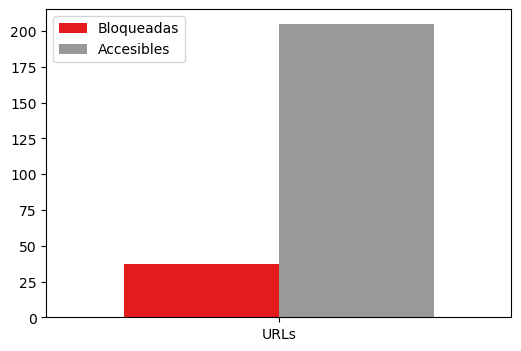

In [4]:
urls_probadas = df.url.unique()
cantidad_de_urls_probadas = len(urls_probadas)
urls_bloqueadas = sorted(set(df.filter(['http_code', 'url']).query("http_code in " + str(bloqueadas)).url))
urls_normales = sorted(set(df.filter(['http_code', 'url']).query("http_code in " + str(accesibles)).url))

urls_bloqueadas_porcentaje = "{0:.0%}".format(len(urls_bloqueadas)/cantidad_de_urls_probadas)
print( len(urls_bloqueadas), "URLs bloqueadas de", cantidad_de_urls_probadas, "probadas\n")

print(urls_bloqueadas_porcentaje, "de bloqueo.\n")

# torificadas 
tor_urls_bloqueadas = sorted(set(
    df.filter(
        ['request_type', 'http_code', 'url']
    ).query(
        "request_type == 'torified' and " \
        "http_code in " + str(bloqueadas)        
    ).url))

tor_urls_normales = sorted(set(
    df.filter(
        ['request_type', 'http_code', 'url']
    ).query(
        "request_type == 'torified' and " \
        "http_code in " + str(accesibles)
    ).url))

url_df = pandas.DataFrame({'Bloqueadas':
                            [len(tor_urls_bloqueadas) ],
                           'Accesibles':
                            [ len(tor_urls_normales) ]
                          },
                          index=['URLs'])

plot = url_df.plot.bar(
    y=['Bloqueadas', 'Accesibles' ],
    figsize=(6, 4),
    rot=0,
    colormap='Set1',
    width=1
)

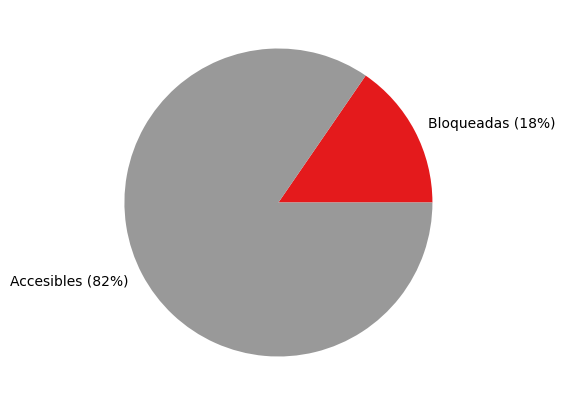

In [5]:
url_df = pandas.DataFrame({'gob.mx': [len(urls_bloqueadas), len(urls_normales)]}, index=['Bloqueadas (18%)', 'Accesibles (82%)'])
plot = url_df.plot.pie(y='gob.mx', figsize=(5, 5), colormap='Set1', ylabel='', legend=False,)